In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [2]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import math
import time
sns.set()

In [3]:
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
#To display the plots
%matplotlib inline

# **Listings**

In [5]:
listings=pd.read_csv('../input/seattle/listings.csv')

In [6]:
listings.info(max_cols=20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 92 entries, id to reviews_per_month
dtypes: float64(17), int64(13), object(62)
memory usage: 2.7+ MB


In [7]:
listings.shape, len(np.unique(listings['id']))

((3818, 92), 3818)

In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [9]:
pd.set_option("display.max_rows", 100)
is_na=listings.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(listings['id'])),2)

license                             100.00
square_feet                          97.46
monthly_price                        60.27
security_deposit                     51.13
weekly_price                         47.38
notes                                42.06
neighborhood_overview                27.03
cleaning_fee                         26.98
transit                              24.46
host_about                           22.50
host_acceptance_rate                 20.25
review_scores_accuracy               17.23
review_scores_checkin                17.23
review_scores_value                  17.18
review_scores_location               17.16
review_scores_cleanliness            17.10
review_scores_communication          17.05
review_scores_rating                 16.95
reviews_per_month                    16.42
first_review                         16.42
last_review                          16.42
space                                14.90
host_response_time                   13.70
host_respon

In [10]:
listings=listings.drop(['license', 'square_feet' ], axis=1)

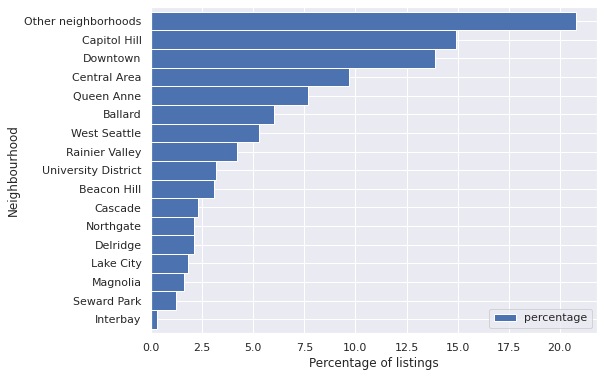

In [11]:
pivot = listings.pivot_table(index=['neighbourhood_group_cleansed'], values=['id'], aggfunc='count', margins=False)
pivot0=pivot.reset_index()
pivot0['percentage']= np.round(100* (pivot0['id']/pivot0['id'].sum()),1)

feq = pivot0[['neighbourhood_group_cleansed', 'percentage']].sort_values('percentage')
feq=feq.set_index('neighbourhood_group_cleansed')
feq.plot.barh(figsize=(8,6),  width= 1)
plt.xlabel('Percentage of listings', fontsize = 12)
plt.ylabel('Neighbourhood', fontsize = 12)
plt.show()

In [12]:
geo_location=listings[["latitude", "longitude"]]

In [13]:

locations = geo_location
map1 = folium.Map(location=[47.6332319,-122.3654769], zoom_start=12)
FastMarkerCluster(data=locations, name='Clusters').add_to(map1)
#HeatMap(data=locations, name='HeatMap').add_to(map1)
map1

In [14]:
map1.save('index.html')

In [15]:
pivot = listings.pivot_table(index=['property_type'], values=['id'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['id']/pivot1['id'].sum()),1)
pivot1.sort_values('percentage', ascending=False)

,property_type,id,percentage
9,House,1733,45.4
0,Apartment,1708,44.7
13,Townhouse,118,3.1
7,Condominium,91,2.4
1,Bed & Breakfast,37,1.0
10,Loft,40,1.0
4,Cabin,21,0.6
11,Other,22,0.6
3,Bungalow,13,0.3
5,Camper/RV,13,0.3


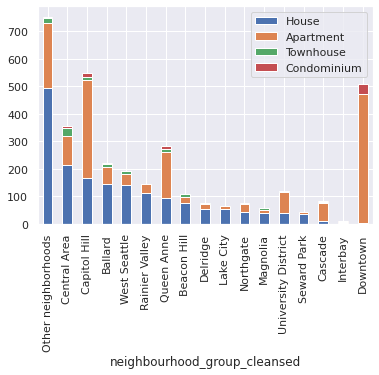

In [16]:
pivot = listings.pivot_table(index=['neighbourhood_group_cleansed'], columns=['property_type'],values=['id'], aggfunc='count', margins=False).fillna(0)
pivot.columns = pivot.columns.droplevel(0) 
pivot = pivot.rename_axis(None, axis=1)
pivot=pivot.sort_values("House", ascending=False)
pivot[["House", "Apartment", "Townhouse", 'Condominium']].plot(kind="bar", stacked=True)
plt.show()

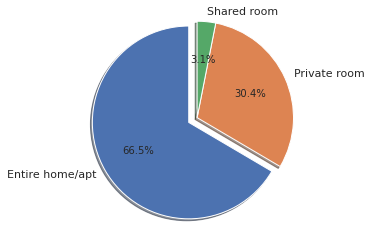

In [17]:

pivot = listings.pivot_table(index=['room_type'], values=['id'], aggfunc='count', margins=False)
pivot1=pivot.reset_index()
pivot1['percentage']= np.round(100* (pivot1['id']/pivot1['id'].sum()),1)
explode = (0.1, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(pivot1['percentage'], explode=explode, labels=pivot1['room_type'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [18]:

listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")
listings['extra_people'] = listings['extra_people'].str.replace("[$, ]", "").astype("float")

In [19]:
listings['host_response_rate']=listings['host_response_rate'].str.replace("%", "").astype("float")
df=listings[['bedrooms', 'bathrooms', 'beds','number_of_reviews','extra_people','host_response_rate','price', 'room_type']]

In [20]:
# sns.pairplot(df,hue='room_type')
# plt.show()

# **Reviews**

In [21]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [22]:
reviews = pd.read_csv('../input/seattle/reviews.csv')
reviews = pd.DataFrame.drop(reviews, columns=['id','date','reviewer_id','reviewer_name'])
reviews.shape, len(reviews[reviews['comments'].isna()==True])

((84849, 2), 18)

In [23]:

reviews=reviews.dropna()

In [24]:
def polarity(entry):
    if (type(entry) != str and math.isnan(entry)):
        return -2
    Rev_opinion = TextBlob(entry)
    return Rev_opinion.sentiment.polarity

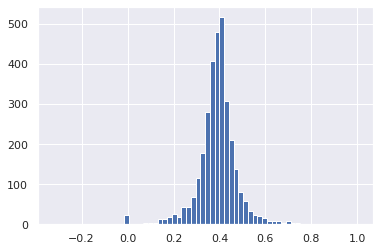

In [25]:
reviews['polarity']=reviews['comments'].apply(polarity)
reviews= reviews[reviews['polarity'] != -2]
polarity=reviews.groupby('listing_id')['polarity']. mean()
plt.hist(polarity, bins='scott')
plt.show()

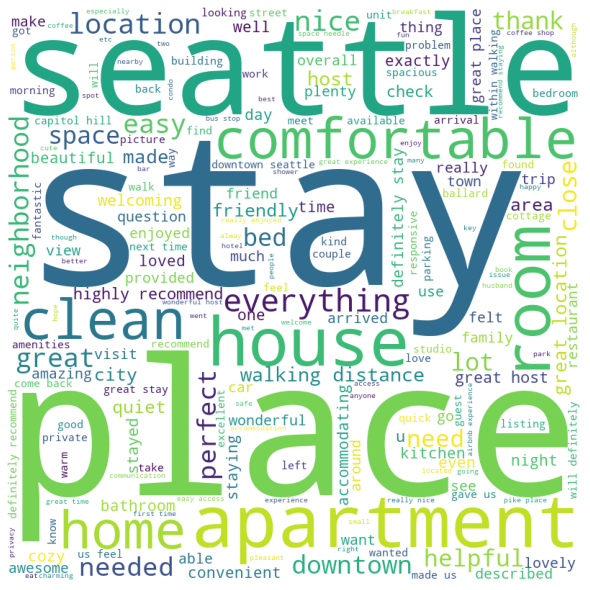

In [26]:
reviews = pd.read_csv('../input/seattle/reviews.csv')
df = pd.DataFrame.drop(reviews, columns=['id','date','reviewer_id','reviewer_name'])

  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# **Pricing**

In [27]:
listings=pd.read_csv('../input/seattle/listings.csv')

In [28]:
listings['price'] = listings['price'].str.replace("[$, ]", "").astype("float")

In [29]:
print('Rango de precios:', max(listings['price']), 'y',  min(listings['price']))

Rango de precios: 1000.0 y 20.0


In [30]:
listings[["price"]].iplot(kind="histogram", bins=200, theme="white", title="Price Distribution",
         xTitle='Price', yTitle='Count')

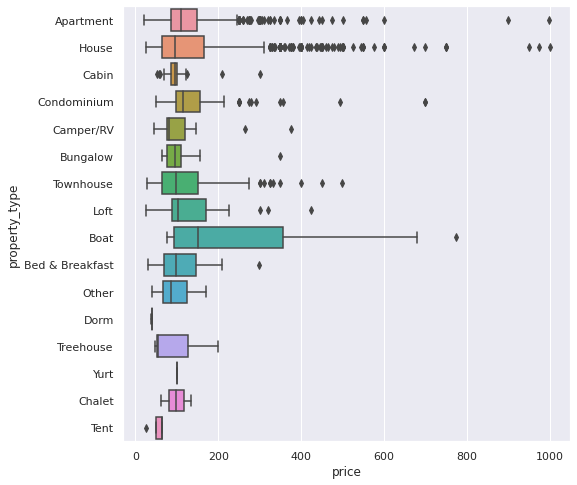

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(x="price", y="property_type", data=listings)
plt.show()

[]

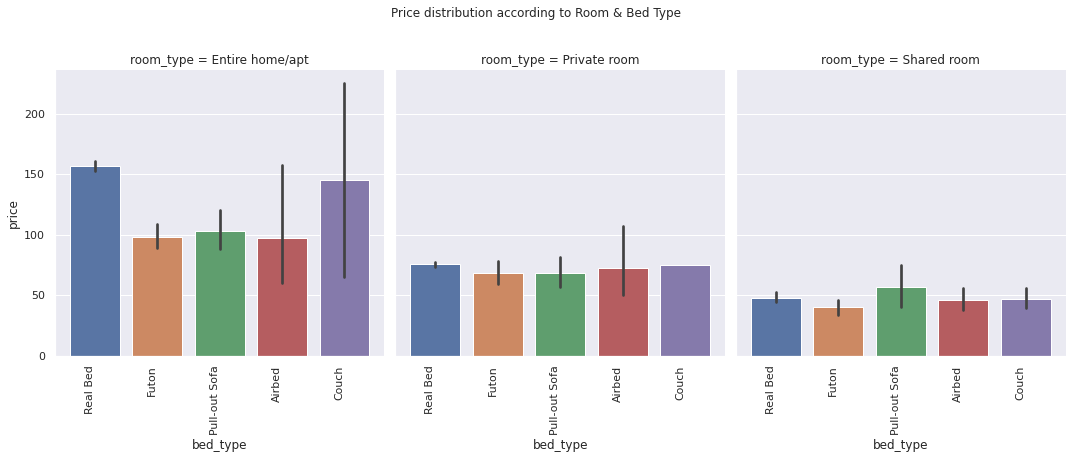

In [32]:
room_bed= sns.catplot(x='bed_type', y='price', col ='room_type', kind= 'bar', data=listings)
room_bed.set_xticklabels(rotation=90, horizontalalignment='right')
room_bed.fig.suptitle("\n".join(["Price distribution according to Room & Bed Type"]), y=1.1)
plt.plot()

In [33]:
price_neigh=pd.pivot_table(data=listings,index=['neighbourhood_group_cleansed', 'zipcode'], values=['price'], aggfunc={'price': [len,min, max, np.mean, np.std, np.median]})
price_neigh.columns =price_neigh.columns.droplevel(0)
price_neigh.sort_values('std', ascending=False)
price_neigh=price_neigh.reset_index()
price_neigh=price_neigh.fillna(0)
price_neigh.head()

,neighbourhood_group_cleansed,zipcode,len,max,mean,median,min,std
0,Ballard,98107,140.0,465.0,128.200000,95.0,25.0,89.050483
1,Ballard,98115,1.0,99.0,99.000000,99.0,99.0,0.000000
2,Ballard,98117,88.0,475.0,118.238636,93.5,35.0,86.567892
3,Beacon Hill,98108,33.0,375.0,88.030303,69.0,35.0,65.171162
4,Beacon Hill,98118,8.0,215.0,98.500000,60.0,45.0,67.639802


In [34]:

cheap=listings[listings['neighbourhood_group_cleansed'].isin(['University District', 'Lake City', 'Rainier Valley', 'Delridge', 'Northgate'])]['price']
expensive=listings[listings['neighbourhood_group_cleansed'].isin(['Magnolia', 'Queen Anne', 'Cascade', 'Capitol Hill', 'Downtown'])]['price']

In [35]:
def mean_aveg(sample):
    return print( np.mean(sample), np.std(sample))

In [36]:
mean_aveg(cheap)

El valor promedio por noche es:  90.5483234714004  y la desviación estándar es:  51.48044124250088


In [37]:
mean_aveg(expensive)

El valor promedio por noche es:  146.2833981841764  y la desviación estándar es:  101.50310402374366


# **Modelling**

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, optimizers, regularizers
from numpy.random import seed
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
seed(123)
print(tf.__version__)

2.3.1


In [39]:
listings=pd.read_csv('../input/seattle/listings.csv')
print('El dataset de entrada contiene', len(listings.columns), 'columnas', 'y', len(listings), 'filas')

El dataset de entrada contiene 92 columnas y 3818 filas


In [40]:
for col in listings.columns: 
    if len(listings[col].unique()) == 1:
        listings.drop(col,inplace=True,axis=1)
        
print('Luego de remover las columnas con un valor único permanecen', len(listings.columns),'columnas')

Luego de remover las columnas con un valor único permanecen 81 columnas


In [41]:
def convert_to_numbers(dataset, column): 
    dataset[column]=dataset[column].str.replace('[$,]', '').astype('float')
    return print('La columna', column, 'ha sido modificada')

Columns_to_convert=['price', 'cleaning_fee', 'extra_people', 'security_deposit']

for variable in Columns_to_convert:
    convert_to_numbers(listings, variable)

La columna price ha sido modificada
La columna cleaning_fee ha sido modificada
La columna extra_people ha sido modificada
La columna security_deposit ha sido modificada


In [42]:
def removing_percentage (dataset, column): 
    dataset[column]=dataset[column].str.replace('%', '').astype('float')
    print('La columna', column, 'ha sido modificada')

removing_perc=['host_acceptance_rate', 'host_response_rate']

for var in removing_perc:
    removing_percentage(listings, var)

La columna host_acceptance_rate ha sido modificada
La columna host_response_rate ha sido modificada


In [43]:
listings.cleaning_fee=listings.cleaning_fee.fillna(0) 
listings.security_deposit=listings.security_deposit.fillna(0)

In [44]:
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.30])
most_missing_cols 

{'monthly_price', 'notes', 'square_feet', 'weekly_price'}

In [45]:
others_type=['Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet', 'Dorm', 'Loft', 'Other', 'Tent', 'Treehouse', 'Yurt']
for others in others_type:
    listings['property_type']=listings['property_type'].replace(others, 'Other')

In [46]:
url_field=list(listings.filter(like='url').columns) 
other_pricing_field=list(listings.filter(like='_price').columns)
text_field=['notes','neighborhood_overview', 'host_about','transit', 'space','summary','description']
other_geo=[ 'zipcode', 'neighbourhood', 'host_name','smart_location',  'is_location_exact', 'street', 'neighbourhood_cleansed', 'city', 'state']
#availability=['availability_60', 'availability_90', 'availability_365']
host=['host_verifications', 'host_total_listings_count' ,'host_has_profile_pic', 'host_location', 'host_id','host_neighbourhood','host_location', 'calculated_host_listings_count', 'host_listings_count']

In [47]:

#listings=listings.drop(url_field+other_pricing_field+text_field+other_geo+availability+host+['square_feet','first_review', 'last_review'], axis=1) 
listings=listings.drop(url_field+other_pricing_field+text_field+other_geo+host+['square_feet','first_review', 'last_review'], axis=1)

In [48]:
listings=listings.drop([ 'name'], axis=1)

In [49]:
listings=listings.dropna()

In [50]:

listings.columns

Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month'],
      dtype='object')

In [51]:

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(listings)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,241032,2011-08-11,within a few hours,96.0,100.0,f,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,4 weeks ago,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07
1,953595,2013-02-21,within an hour,98.0,100.0,t,t,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2015-04-13,within a few hours,99.0,100.0,f,t,Other neighborhoods,47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",359.0,0.0,230.0,1,0.0,3,1125,today,18,32,32,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,f,strict,f,f,0.30
3814,8902327,2015-10-14,within an hour,100.0,100.0,f,t,Capitol Hill,47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",79.0,500.0,50.0,3,25.0,2,29,2 days ago,6,26,44,273,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,2.00


In [52]:
listings.replace({'f': 0, 't': 1}, inplace=True)

In [53]:
listings.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,241032,2011-08-11,within a few hours,96.0,100.0,0,1,Queen Anne,47.636289,-122.371025,...,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,4.07
1,953595,2013-02-21,within an hour,98.0,100.0,1,1,Queen Anne,47.639123,-122.365666,...,10.0,10.0,10.0,10.0,10.0,0,strict,1,1,1.48
2,3308979,2014-06-12,within a few hours,67.0,100.0,0,1,Queen Anne,47.629724,-122.369483,...,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,1.15
6,1909058,2012-05-30,within an hour,100.0,100.0,1,1,Queen Anne,47.636605,-122.368519,...,10.0,10.0,10.0,10.0,10.0,0,moderate,0,0,2.46
7,856550,2012-10-30,within an hour,100.0,100.0,1,1,Queen Anne,47.640161,-122.375856,...,10.0,10.0,10.0,9.0,10.0,0,strict,1,1,4.73


In [54]:
listings=pd.concat([listings, pd.get_dummies(listings['host_response_time'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['property_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['room_type'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['cancellation_policy'])], axis=1) 
listings=pd.concat([listings, pd.get_dummies(listings['bed_type'])], axis=1) 
#listings=pd.concat([listings, pd.get_dummies(listings['calendar_updated'])], axis=1)

In [55]:

var_categorical=['host_response_time', 'property_type', 'room_type',  'bed_type', 'cancellation_policy', 'neighbourhood_group_cleansed','calendar_updated' ]
listings=listings.drop(var_categorical, axis=1)

In [56]:

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(listings)

,id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,a few days or more,within a day,within a few hours,within an hour,Apartment,Condominium,House,Other,Townhouse,Entire home/apt,Private room,Shared room,flexible,moderate,strict,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,241032,2011-08-11,96.0,100.0,0,1,47.636289,-122.371025,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,4.07,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,953595,2013-02-21,98.0,100.0,1,1,47.639123,-122.365666,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,1.48,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2015-04-13,99.0,100.0,0,1,47.664295,-122.359170,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",359.0,0.0,230.0,1,0.0,3,1125,18,32,32,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0,0,0,0.30,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3814,8902327,2015-10-14,100.0,100.0,0,1,47.649552,-122.318309,4,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",79.0,500.0,50.0,3,25.0,2,29,6,26,44,273,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2.00,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [57]:
listings['TV']=listings.amenities.apply(lambda s: int("TV" in str(s)[1:].split(',')))
listings['Internet']=listings.amenities.apply(lambda s: int("Internet" in str(s)[1:].split(',')))
listings['Kitchen']=listings.amenities.apply(lambda s: int("Kitchen" in str(s)[1:].split(',')))

In [58]:
listings=listings.drop(['id', 'host_since', 'amenities'], axis=1) 

In [59]:
listings[['price']].iplot(kind='box',boxpoints="outliers")

In [60]:
listings.price.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     25.0
0.1     52.0
0.2     66.0
0.3     79.0
0.4     90.0
0.5     99.0
0.6    115.0
0.7    130.0
0.8    151.0
0.9    200.0
1.0    999.0
Name: price, dtype: float64

In [61]:
len(listings[listings.price<400])

2619

In [62]:
listings=listings[listings.price<400]

In [63]:
2619/2655

0.9864406779661017

In [64]:
dataset=listings
print(dataset.shape)

Las dimensiones del conjunto de salida son (2619, 56)


In [65]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [66]:
train_stats = train_dataset.describe()
#train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
host_response_rate,2095.0,95.361814,10.808124,25.000000,98.000000,100.000000,100.000000,100.000000
host_acceptance_rate,2095.0,99.952267,2.184781,0.000000,100.000000,100.000000,100.000000,100.000000
host_is_superhost,2095.0,0.260621,0.439078,0.000000,0.000000,0.000000,1.000000,1.000000
host_identity_verified,2095.0,0.832936,0.373122,0.000000,1.000000,1.000000,1.000000,1.000000
latitude,2095.0,47.628326,0.042761,47.507284,47.607946,47.622768,47.663120,47.733358
longitude,2095.0,-122.332774,0.031703,-122.417219,-122.353469,-122.329121,-122.310792,-122.254189
accommodates,2095.0,3.349881,1.915171,1.000000,2.000000,3.000000,4.000000,16.000000
bathrooms,2095.0,1.231981,0.573307,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,2095.0,1.247733,0.816036,0.000000,1.000000,1.000000,2.000000,7.000000
beds,2095.0,1.720286,1.075935,1.000000,1.000000,1.000000,2.000000,10.000000


In [67]:
train_stats.shape

(56, 8)

In [68]:

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [69]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(normed_test_data)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,a few days or more,within a day,within a few hours,within an hour,Apartment,Condominium,House,Other,Townhouse,Entire home/apt,Private room,Shared room,flexible,moderate,strict,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,TV,Internet,Kitchen
0,0.059047,0.021848,-0.593563,0.447747,0.186225,-1.206532,0.339458,-0.404637,-0.303580,-0.669452,-0.476807,-0.668614,-0.960235,0.249724,-0.366224,-0.065339,-0.700906,-0.332737,0.073728,0.281295,0.769334,4.308232,0.070294,0.519731,0.559487,0.355703,0.337681,-0.963198,0.723788,-0.473628,-0.338969,-0.374672,0.926347,-0.098153,-0.422143,1.550921,-1.095471,1.095471,-0.149797,-0.908906,-0.215479,-0.165684,0.703650,-0.651152,-0.18588,-0.559024,1.323677,-0.813869,-0.082002,-0.05358,-0.134052,-0.120503,0.208101,0.699863,0.579600,0.338969
7,0.429139,0.021848,1.683937,0.447747,0.276762,-1.358908,-0.704836,-0.404637,-0.303580,-0.669452,-0.863329,0.074745,-0.426131,-0.555155,-0.661361,-0.019619,-1.400739,0.375862,0.120964,-0.671594,-1.260886,3.484251,0.373937,0.519731,0.559487,0.355703,0.337681,-0.963198,0.723788,-0.473628,2.948715,2.667725,1.279915,-0.098153,-0.422143,-0.644470,0.912413,-0.912413,-0.149797,-0.908906,4.638600,-0.165684,-1.420482,1.535007,-0.18588,-0.559024,-0.755111,1.228113,-0.082002,-0.05358,-0.134052,-0.120503,0.208101,-1.428168,-1.724503,-2.948715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,0.151570,0.021848,-0.593563,0.447747,0.767163,-0.519295,6.605218,3.956031,3.372726,7.695370,2.074237,0.570318,1.176182,8.298513,0.814325,-0.065339,0.784773,0.641587,0.546084,0.314153,0.620782,-0.611421,0.070294,0.519731,0.559487,0.355703,0.337681,0.616990,0.723788,-0.473628,-0.338969,-0.374672,0.888847,-0.098153,-0.422143,1.550921,-1.095471,-0.912413,-0.149797,1.099699,-0.215479,-0.165684,0.703650,-0.651152,-0.18588,-0.559024,1.323677,-0.813869,-0.082002,-0.05358,-0.134052,-0.120503,0.208101,0.699863,0.579600,0.338969
3810,0.429139,0.021848,-0.593563,0.447747,0.605202,-0.625469,0.861604,-0.404637,0.921855,1.189397,0.589993,0.074745,0.855719,1.859482,2.290010,-0.019619,-1.387055,-0.421312,0.168199,0.347011,-0.212764,-0.587186,-0.385170,-0.872643,-2.051038,0.355703,0.337681,0.616990,-1.967137,-0.473628,-0.338969,-0.374672,-0.418282,-0.098153,-0.422143,-0.644470,0.912413,-0.912413,-0.149797,1.099699,-0.215479,-0.165684,0.703650,-0.651152,-0.18588,-0.559024,-0.755111,1.228113,-0.082002,-0.05358,-0.134052,-0.120503,0.208101,0.699863,0.579600,0.338969


In [70]:

train_labels = normed_train_data.pop('price')
test_labels = normed_test_data.pop('price')

In [71]:
def build_model():  
  model = keras.Sequential([
    layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=[len(normed_train_data.keys())]),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer=Adam(0.001)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [72]:
model = build_model()

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14336     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 22,593
Trainable params: 22,593
Non-trainable params: 0
_________________________________________________________________


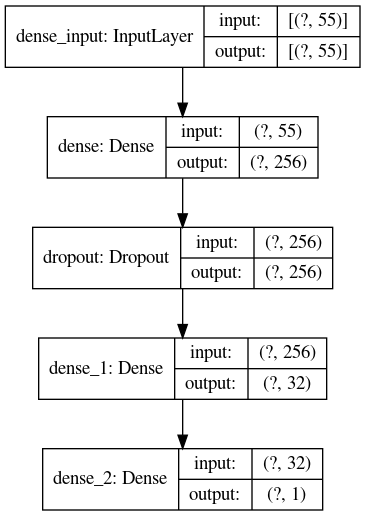

In [74]:
plot_model(model, to_file='regresion_model_keras.png', show_shapes=True)

In [75]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.1457153 ],
       [ 0.09615073],
       [ 0.13799141],
       [ 0.6353429 ],
       [ 0.79815114],
       [ 0.16220272],
       [ 0.3409862 ],
       [-0.36462837],
       [ 0.13750114],
       [ 0.60403645]], dtype=float32)

In [76]:
# Display training progress by printing a single dot for each completed epoch
time_start = time.time()

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

time_end = time.time()
print(f"\nTiempo de ejecución: {round((time_end - time_start)/60,1)} minutos")


....................................................................................................
....................................................................................................
Tiempo de ejecución: 0.3 minutos


In [77]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,0.223732,0.166248,0.066608,0.452961,0.395333,0.329500,195
196,0.223607,0.166332,0.065000,0.445073,0.387906,0.344573,196
197,0.222739,0.165669,0.067430,0.451321,0.394195,0.332555,197
198,0.229328,0.172169,0.069358,0.460682,0.403371,0.370468,198
199,0.222712,0.165608,0.065932,0.465527,0.408955,0.360167,199


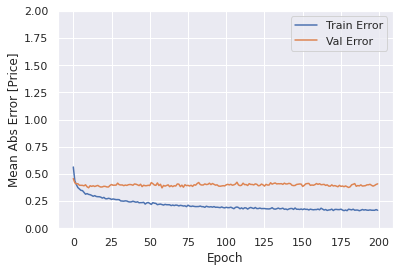

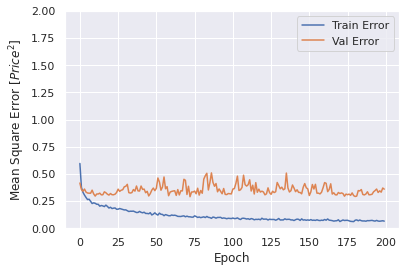

In [78]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()
  plt.show()


plot_history(history)


...................................

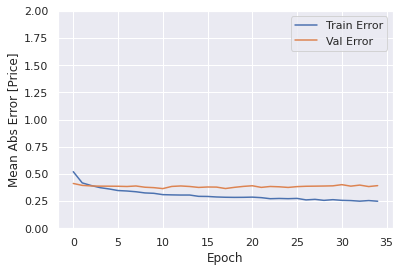

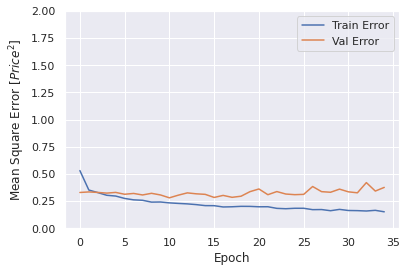

In [79]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [80]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

17/17 - 0s - loss: 0.4476 - mae: 0.3891 - mse: 0.3041
Testing set Mean Abs Error:  0.39


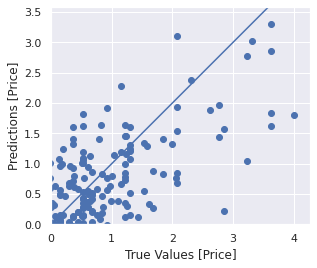

In [81]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 350], [-100, 350])

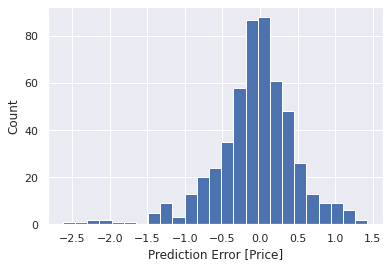

In [82]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [83]:
y_test_pred = model.predict(normed_test_data)
y_train_pred = model.predict(normed_train_data)
print("Training MSE:", round(mean_squared_error(train_labels, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(test_labels, y_test_pred),4))
print("\nTraining r2:", round(r2_score(train_labels, y_train_pred),4))
print("Validation r2:", round(r2_score(test_labels, y_test_pred),4))

Training MSE: 0.1769
Validation MSE: 0.3041

Training r2: 0.823
Validation r2: 0.6352


In [84]:
def min_max(x): 
    return (x-x.min())/(x.max()-x.min())

In [85]:
normed_data = min_max(dataset)

In [86]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

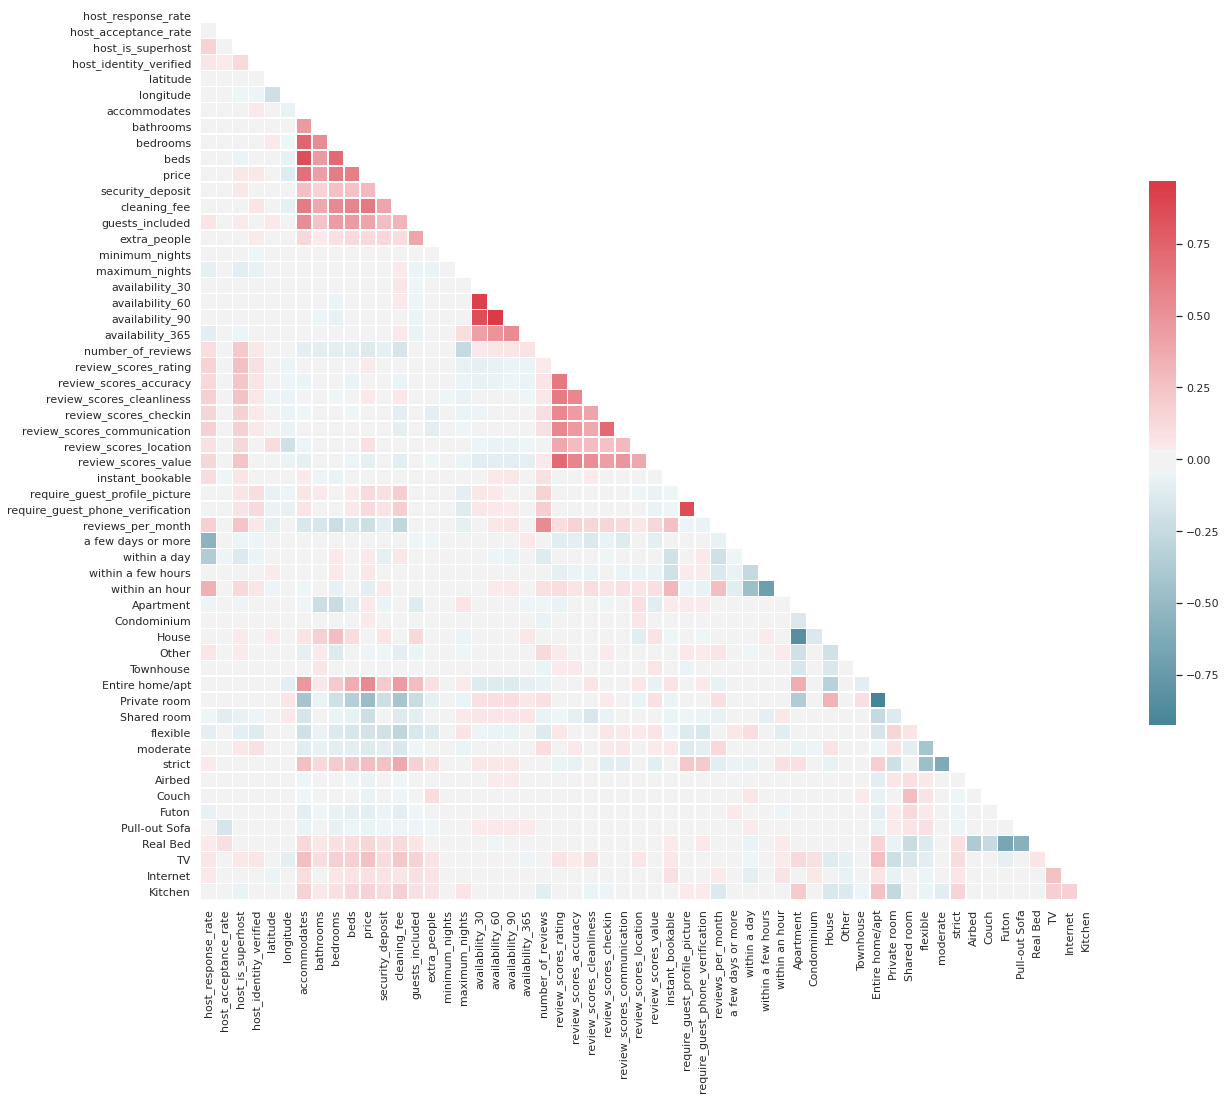

In [87]:
multi_collinearity_heatmap(normed_data, figsize=(20,20)) 

In [88]:
normed_data=normed_data.drop([ 'guests_included', 'extra_people', 'availability_60', 'availability_90', 'availability_365',
'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
       'review_scores_value','flexible', 'number_of_reviews', 'security_deposit','Other'                     
                              
                             ], axis=1) #'number_of_reviews' 'security_deposit',

In [89]:

normed_train_data= normed_data.sample(frac=0.8,random_state=0)
normed_test_data = normed_data.drop(normed_train_data.index)

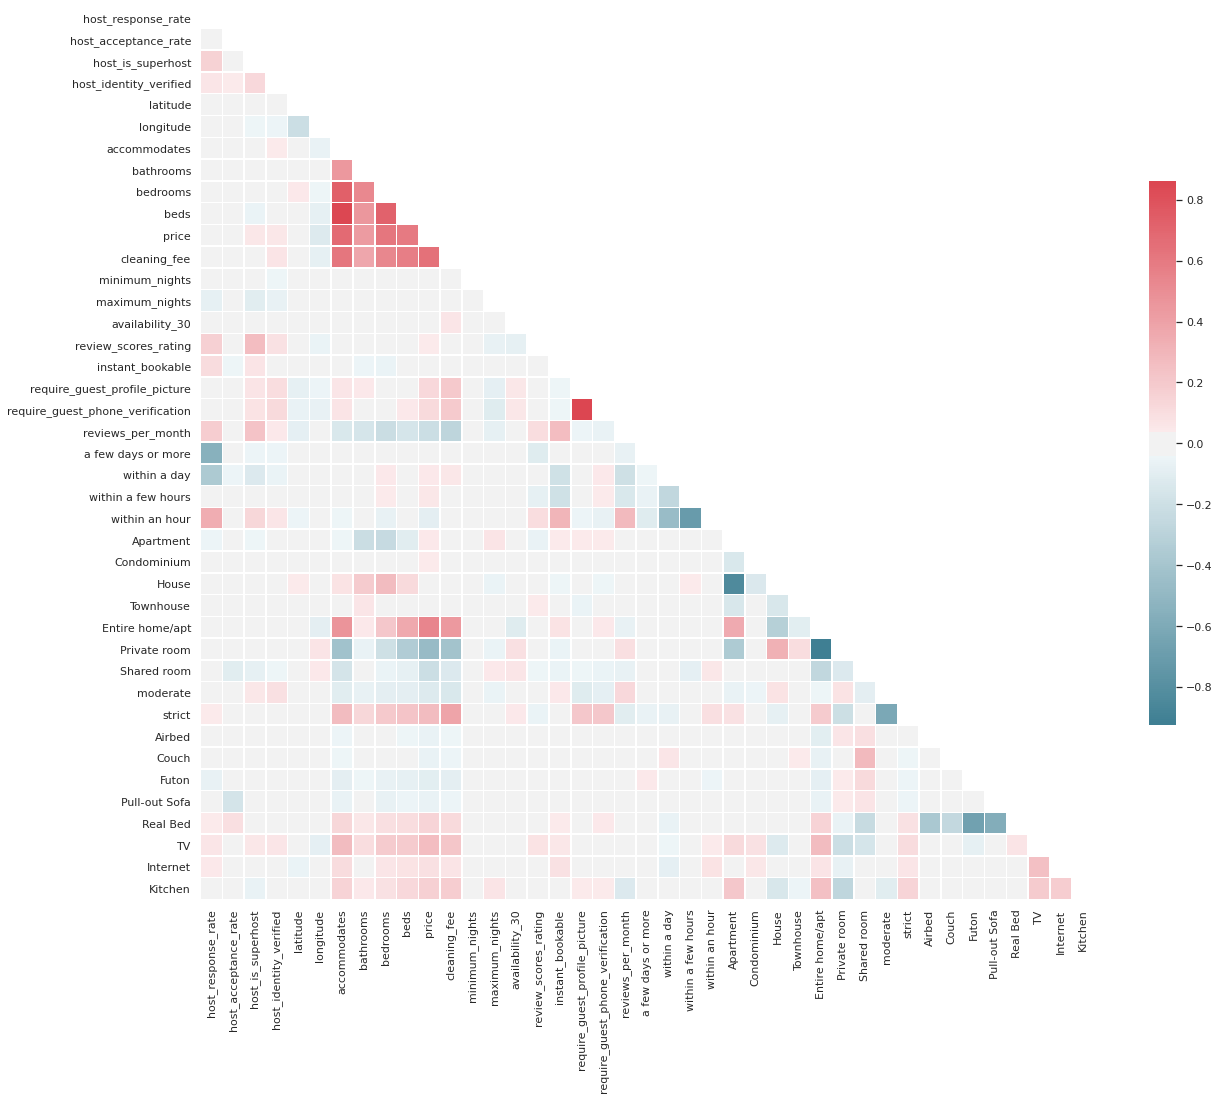

In [90]:

#normed_test_data.columns
multi_collinearity_heatmap(normed_data, figsize=(20,20)) 

In [91]:

train_labels = normed_train_data.pop('price')
test_labels = normed_test_data.pop('price')

In [92]:
# ,kernel_regularizer=regularizers.l2(0.05)
def build_model():  
  model = keras.Sequential([
    layers.Dense(512, activation='relu',input_shape=[len(normed_train_data.keys())]),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
  ])

  optimizer=Adam(0.01) #0.1

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [93]:
model = build_model()

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               20992     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 152,577
Trainable params: 152,577
Non-trainable params: 0
_________________________________________________________________


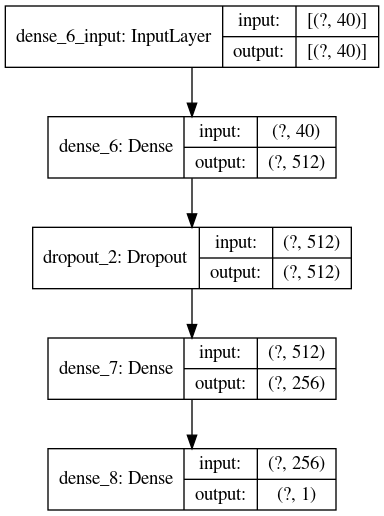

In [95]:
plot_model(model, to_file='regresion_model_keras.png', show_shapes=True)

In [96]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.36733967],
       [0.30894056],
       [0.25418192],
       [0.3145151 ],
       [0.36466172],
       [0.41632107],
       [0.46958944],
       [0.37894955],
       [0.32660133],
       [0.44111574]], dtype=float32)

In [97]:
# Display training progress by printing a single dot for each completed epoch
time_start = time.time()

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

time_end = time.time()
print(f"\nTiempo de ejecución: {round((time_end - time_start)/60,1)} minutos")


....................................................................................................
....................................................................................................
Tiempo de ejecución: 0.6 minutos


In [98]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,0.008247,0.065746,0.008247,0.012198,0.075621,0.012198,195
196,0.009765,0.069377,0.009765,0.011401,0.072840,0.011401,196
197,0.008640,0.066350,0.008640,0.011307,0.071099,0.011307,197
198,0.007809,0.064187,0.007809,0.010684,0.070400,0.010684,198
199,0.008212,0.065446,0.008212,0.010595,0.070310,0.010595,199


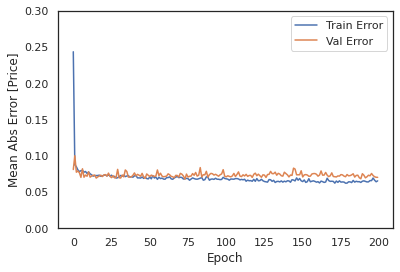

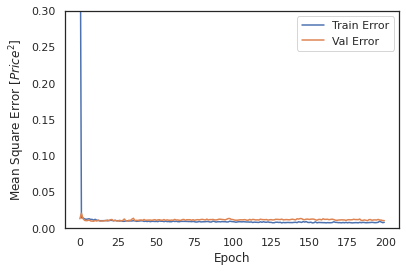

In [99]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.3])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.3])
  plt.legend()
  plt.show()


plot_history(history)


...............

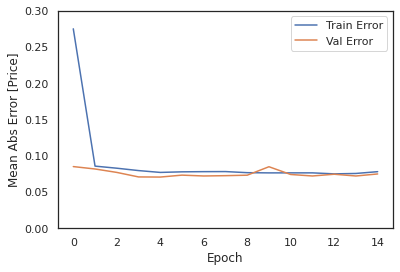

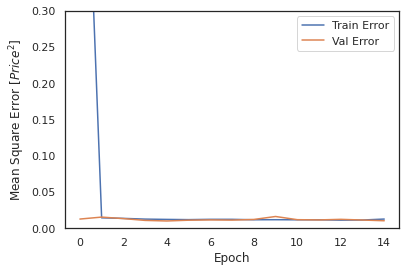

In [100]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [101]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

17/17 - 0s - loss: 0.0098 - mae: 0.0740 - mse: 0.0098
Testing set Mean Abs Error:  0.07


524


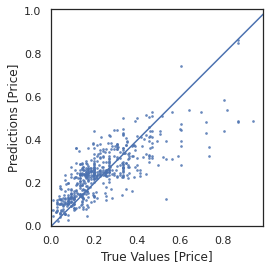

In [102]:
test_predictions = model.predict(normed_test_data).flatten()
print(len(test_predictions))
plt.scatter(test_labels, test_predictions,alpha=0.7,s=3)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([-0,plt.xlim()[1]])
plt.ylim([-0,plt.ylim()[1]])
_ = plt.plot([-1, 10], [-1, 10]) #El modelo subestima para precios mayores a 200 dolares

524


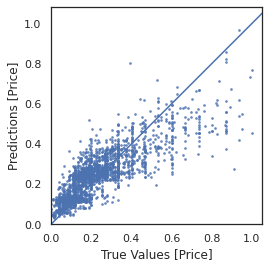

In [103]:
train_predictions = model.predict(normed_train_data).flatten()
print(len(test_predictions))
plt.scatter(train_labels, train_predictions,alpha=0.7,s=3)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1, 10], [-1, 10])

In [104]:
error.iplot(kind="histogram", bins=25, theme="white",
         xTitle='Prediction Error', yTitle='Count')

In [105]:

y_test_pred = model.predict(normed_test_data)
y_train_pred = model.predict(normed_train_data)
print("Training MSE:", round(mean_squared_error(train_labels, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(test_labels, y_test_pred),4))
print("\nTraining r2:", round(r2_score(train_labels, y_train_pred),4))
print("Validation r2:", round(r2_score(test_labels, y_test_pred),4))

Training MSE: 0.0104
Validation MSE: 0.0098

Training r2: 0.6523
Validation r2: 0.6068
